## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("../../data/diabetes.tsv",sep='\t')
df.head()


In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [1]:
import pandas as pd
import numpy as npx
data = {
    'AGE': [59,48,72,24,50],
    'SEX': [2,1,2,1,1],
    'BMI': [32.1, 21.6, 30.5, 25.3, 23.0],
    'BP': [101.0, 87.0, 93.0, 84.0, 101.0],
    'S1': [157, 183, 156, 198, 192],
    'S2': [93.2, 103.2, 93.6, 131.4, 125.4],
    'S3': [38.0, 70.0, 41.0, 40.0, 52.0],
    'S4': [4.0, 3.0, 4.0, 5.0, 4.0],
    'S5': [4.8598, 3.8918, 4.6728, 4.8903, 4.2905],
    'S6': [87, 69, 85, 89, 80],
    'Y': [151, 75, 141, 206, 135]
}

df = pd.DataFrame(data)


means = df.mean()
variances = df.var()

print("平均值：")
print(means)
print("\n方差：")
print(variances)


平均值：
AGE     50.60000
SEX      1.40000
BMI     26.50000
BP      93.20000
S1     177.20000
S2     109.36000
S3      48.20000
S4       4.00000
S5       4.52104
S6      82.00000
Y      141.60000
dtype: float64

方差：
AGE     310.800000
SEX       0.300000
BMI      21.265000
BP       61.200000
S1      385.700000
S2      322.628000
S3      178.200000
S4        0.500000
S5        0.180809
S6       64.000000
Y      2178.800000
dtype: float64


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

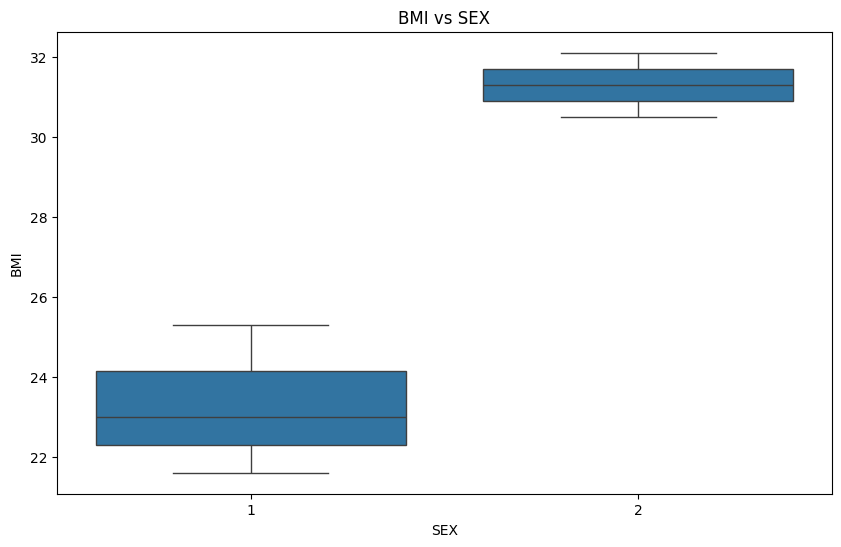

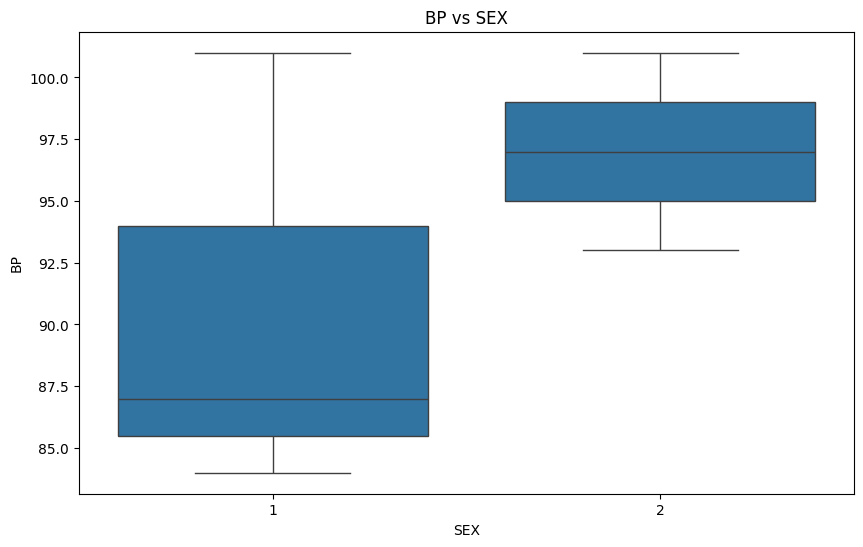

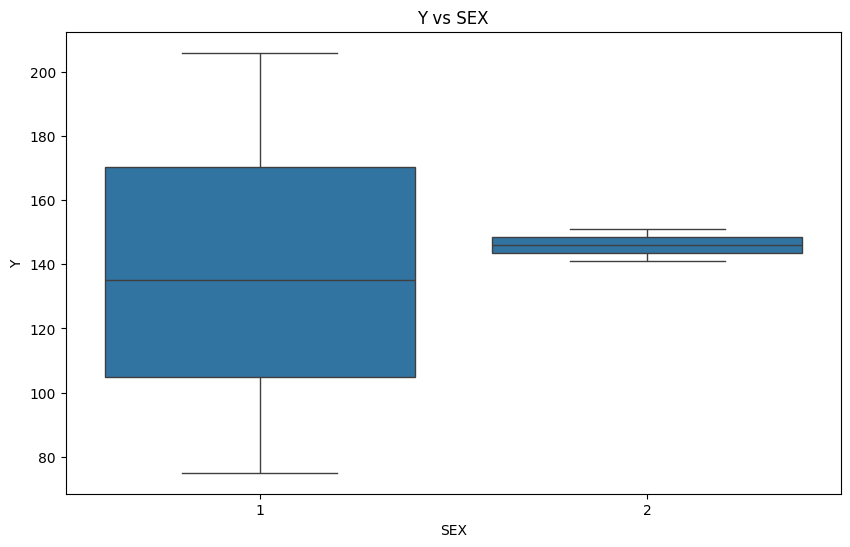

In [2]:

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='BMI', data=df)
plt.title('BMI vs SEX')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='BP', data=df)
plt.title('BP vs SEX')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='Y', data=df)
plt.title('Y vs SEX')
plt.show()

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], kde=True)
plt.title('AGE Distribution')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='SEX', data=df)
plt.title('SEX Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=True)
plt.title('BMI Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Y'], kde=True)
plt.title('Y Distribution')
plt.show()


### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

AGE   -0.446528
SEX    0.086050
BMI    0.374450
BP    -0.107898
S1     0.185009
S2     0.471520
S3    -0.841188
S4     0.992242
S5     0.885509
S6     0.920543
Y      1.000000
Name: Y, dtype: float64


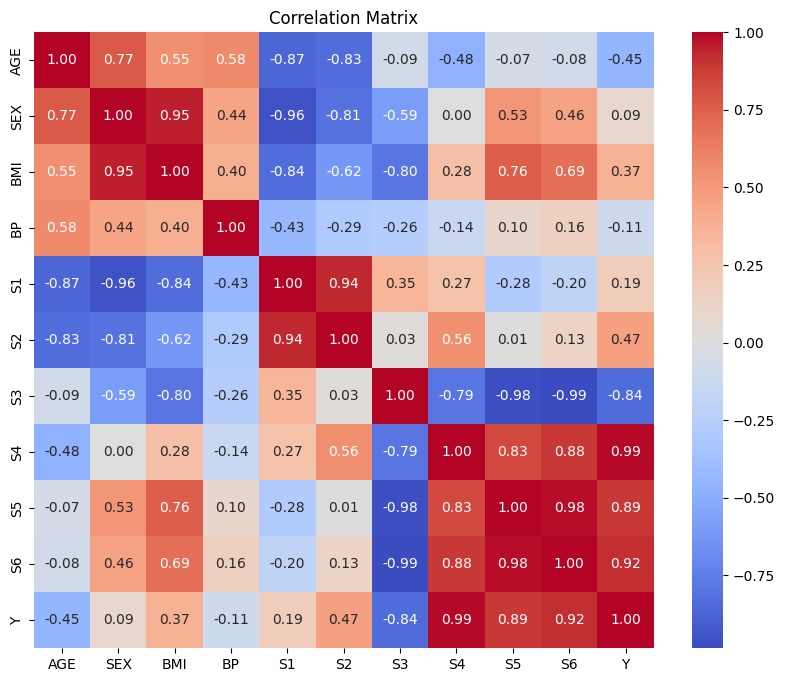

In [3]:
correlation_matrix = df.corr()
print(correlation_matrix['Y'])


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [4]:
from scipy import stats


male_data = df[df['SEX'] == 1]['Y']
female_data = df[df['SEX'] == 2]['Y']


t_stat, p_value = stats.ttest_ind(male_data, female_data)

print("t统计量:", t_stat)
print("P值:", p_value)


alpha = 0.05
if p_value < alpha:
    print("拒绝零假设：男性和女性糖尿病进展程度不同")
else:
    print("接受零假设：男性和女性糖尿病进展程度相似")

t统计量: -0.1495987234296736
P值: 0.8905724713636425
接受零假设：男性和女性糖尿病进展程度相似
